In [6]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np

In [7]:
import os
import cv2

dataset_dir = "C:\\Users\\91939\\OneDrive\\Desktop\\prospace_assignment"

image_files = os.listdir(dataset_dir)

In [4]:
num_files = len(image_files)
print(num_files)
random_image_filename = random.choice(image_files)


image_path = os.path.join(dataset_dir, random_image_filename)


image = cv2.imread(image_path)
print(image)
cv2.imshow("Random Image", image)  
cv2.waitKey(0)

6816
[[[ 66 107 136]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 57  93 118]
  [ 57  86 111]
  [ 58  81 106]
  [  0   0   0]
  [  0   0   0]]

 [[ 50  73 101]
  [ 47  71  97]
  [ 48  69 101]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 45  71  97]
  [ 49  75 105]
  [ 54  85 111]
  [  0   0   0]]

 [[  0   0   0]
  [ 49  71  97]
  [ 57  75 110]
  [ 68  97 136]
  [  0   0   0]]

 [[  0   0   0]
  [ 44  65  82]
  [ 59  77 115]
  [ 66  89 128]
  [  0   0   0]]

 [[  0   0   0]
  [ 43  69  84]
  [ 52  81 122]
  [ 56  76 106]
  [  0   0   0]]

 [[  0   0   0]
  [ 42  76  99]
  [ 48  80 109]
  [ 55  75  99]
  [ 45  69  79]]

 [[  0   0   0]
  [  0   0   0]
  [ 45  73  97]
  [ 55  80 109]
  [ 66  91 128]]

 [[  0   0   0]
  [  0   0   0]
  [ 43  67  88]
  [ 51  78 115]
  [ 66  92 126]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [ 47  81 102]
  [ 58  89 109]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [ 59  90 110]]]


-1

In [8]:
def resize(image_path, size,normalisation_mode = "minmax"):
    img = cv2.imread(image_path)
    resize_img  = cv2.resize(img,dsize = size,interpolation=cv2.INTER_AREA)
    norm_img = resize_img.astype(np.float32)/255.0
    return norm_img

In [7]:
random_img = random.choice(image_files)
image_path = os.path.join(dataset_dir,random_img)
normimg = resize(image_path,(244,244))

In [8]:
print(normimg.shape)

(244, 244, 3)


In [9]:
cv2.imshow("normalised img",normimg)
cv2.waitKey(0)

-1

In [9]:
normalised_images = []
for filename in image_files:
    img_path = os.path.join(dataset_dir,filename)
    norm_img = resize(img_path,(244,244))
    normalised_images.append(norm_img)
    

In [11]:
cv2.imshow("Normalized Image",normalised_images[2])
cv2.waitKey(0)


-1

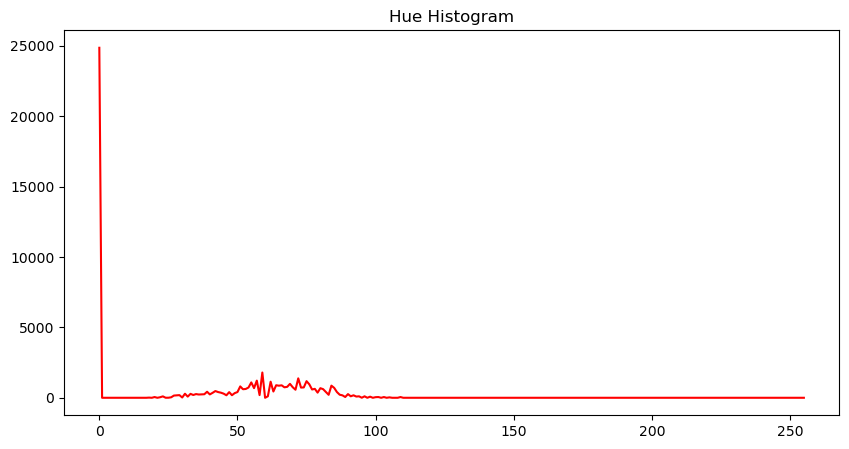

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
hsv_image = cv2.cvtColor(normalised_images[0], cv2.COLOR_BGR2HSV)
hue_hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])


plt.figure(figsize=(10, 5))
plt.plot(hue_hist, color='r')
plt.title('Hue Histogram')
plt.show()


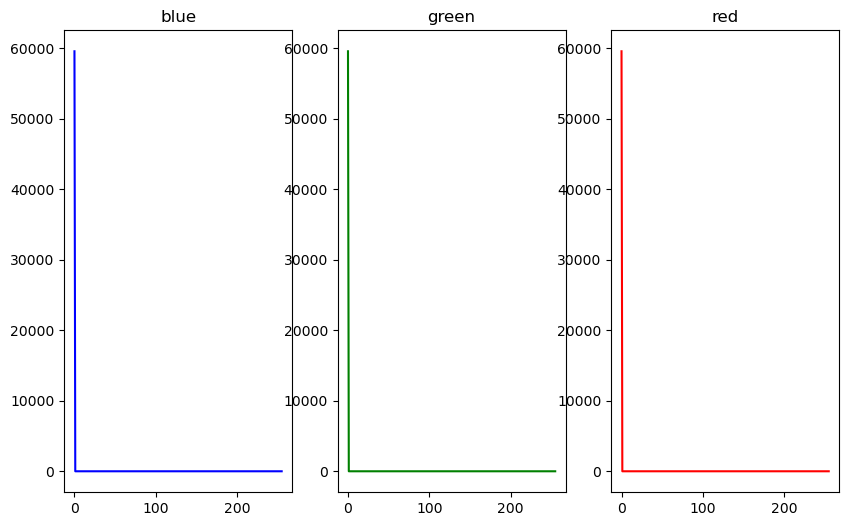

In [15]:

bgr_image = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

#  (B, G, R)
hist_b = cv2.calcHist([bgr_image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([bgr_image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([bgr_image], [2], None, [256], [0, 256])


plt.figure(figsize = (10,6))
plt.subplot(1,3,1)
plt.plot(hist_b, color='blue')
plt.title('blue')
plt.subplot(1,3,2)
plt.title('green')
plt.plot(hist_g, color='green')
plt.subplot(1,3,3)
plt.plot(hist_r, color='red')
plt.title('red')
plt.show()


Color Histogram Features:
[26342.  1191.  8627. 19990.  3386.     0.     0.     0. 59536.     0.
     0.     0.     0.     0.     0.     0. 59536.     0.     0.     0.
     0.     0.     0.     0.]


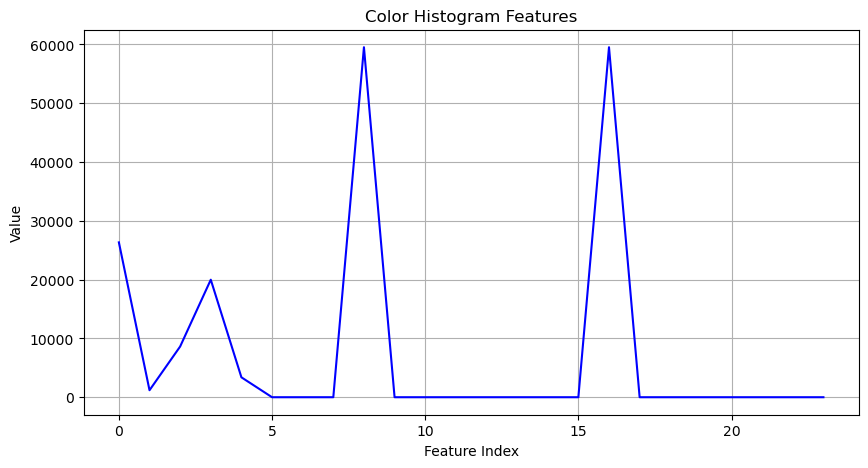

In [11]:

def compute_color_histogram(image, bins=8):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_hist = cv2.calcHist([hsv_image], [0], None, [bins], [0, 180])
    s_hist = cv2.calcHist([hsv_image], [1], None, [bins], [0, 256])
    v_hist = cv2.calcHist([hsv_image], [2], None, [bins], [0, 256])
    color_histogram = np.concatenate((h_hist, s_hist, v_hist)).flatten()
    
    return color_histogram
image = normalised_images[90]


histogram_features = compute_color_histogram(image)
print("Color Histogram Features:")
print(histogram_features)


plt.figure(figsize=(10, 5))
plt.plot(histogram_features, color='blue')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.title('Color Histogram Features')
plt.grid(True)
plt.show()

Color Histogram Features:
[26936. 14892. 13191.  4342.   175.     0.     0.     0. 59536.     0.
     0.     0.     0.     0.     0.     0. 59536.     0.     0.     0.
     0.     0.     0.     0.]


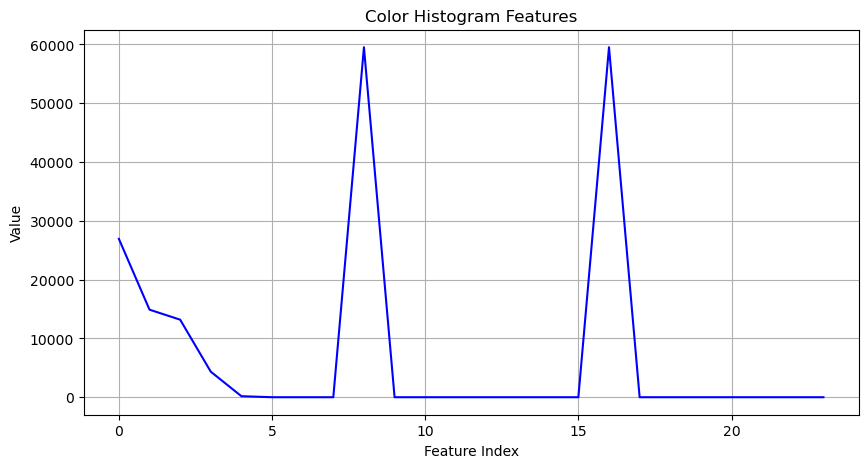

In [12]:
image = normalised_images[900]
histogram_features = compute_color_histogram(image)
print("Color Histogram Features:")
print(histogram_features)

plt.figure(figsize=(10, 5))
plt.plot(histogram_features, color='blue')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.title('Color Histogram Features')
plt.grid(True)
plt.show()

Color Histogram Features:
[1.4948e+04 8.7330e+03 7.2000e+03 1.5947e+04 1.1871e+04 8.1700e+02
 1.2000e+01 0.0000e+00 5.9536e+04 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 5.9536e+04 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]


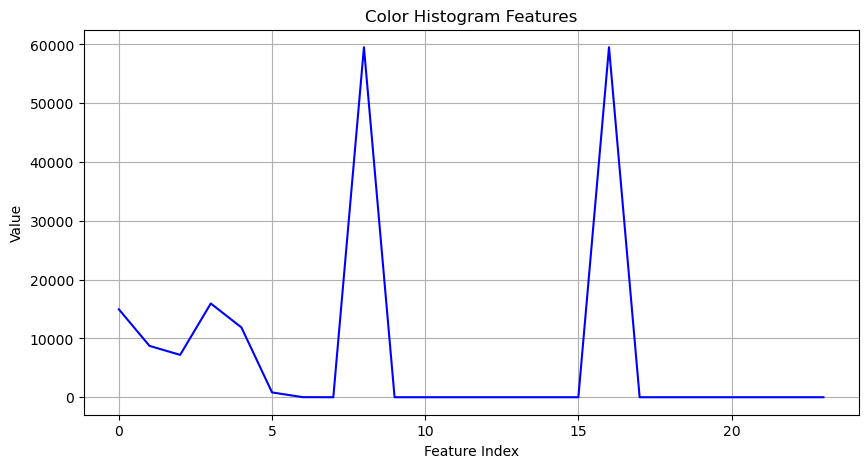

In [13]:
image = normalised_images[4500]
histogram_features = compute_color_histogram(image)
print("Color Histogram Features:")
print(histogram_features)

plt.figure(figsize=(10, 5))
plt.plot(histogram_features, color='blue')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.title('Color Histogram Features')
plt.grid(True)
plt.show()

In [19]:
cv2.imshow("normimg",normalised_images[4500])
cv2.waitKey(0)

-1

In [14]:
features = []
for image in normalised_images:
    histogram_features = compute_color_histogram(image)
    features.append(histogram_features)
    
featuresarr = np.array(features)

In [22]:
print(len(featuresarr))


6816


In [23]:
nun = np.isnan(featuresarr)
num = np.sum(nun)
print(num)

0


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3,random_state = 42)
cluster_labels = kmeans.fit_predict(featuresarr)

In [25]:
print(len(cluster_labels))

6816


In [16]:
import cv2
import numpy as np

unique_labels = np.unique(cluster_labels)

for label in unique_labels:
    print(f"Cluster {label}:")
    
    cluster_indices = np.where(cluster_labels == label)[0]
    
    sampled_indices = np.random.choice(cluster_indices, size=5, replace=False)
    
    for idx in sampled_indices:
       
        image = normalised_images[idx]
        cv2.imshow(f"Cluster {label}: Image {idx}", image)
      
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Cluster 0:
Cluster 1:
Cluster 2:


In [27]:
image_paths = []
for img in image_files:
    imp = os.path.join(dataset_dir, img)
    image_paths.append(imp)
    
print(len(image_paths))

6816


In [ ]:
import csv
labels_map = {0:'no_crop', 1:'growing',2:'lush'}
data = [('image_path','label')]  #list 

for image_path, cluster_label in zip(image_paths, cluster_labels):
    label = labels_map.get(cluster_label, 'unknown')
    
    data.append((image_path, label))
    
csv_file = r"C:\Users\91939\OneDrive\Desktop\datasets\image_labels.csv"

with open(csv_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)

print(f"CSV file '{csv_file}' created successfully.")

In [16]:
df = pd.read_csv(r"C:\Users\91939\OneDrive\Desktop\datasets\image_labels.csv")
print(df['label'].value_counts())

growing    2842
lush       2206
no_crop    1768
Name: label, dtype: int64


In [29]:
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df = pd.read_csv(r"C:\Users\91939\OneDrive\Desktop\datasets\image_labels.csv")
x = []
y = []
label_mapping = {'growing': 0, 'lush': 1, 'no_crop': 2}
df['label'] = df['label'].map(label_mapping)
for ind, row in df.iterrows():
    img_path = row['image_path']
    label = row['label']
    
    #img = cv2.imread(img_path)
    image = resize(img_path,(244,244))
    hist_features = cv2.calcHist([image], [0, 1, 2], None, [32,32,32], [0, 256, 0, 256, 0, 256])
    hist_features_normalized = hist_features / np.sum(hist_features)
    x.append(hist_features_normalized.flatten())
    y.append(label)
    
x = np.array(x)
y = np.array(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.42077464788732394


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59       717
           1       0.00      0.00      0.00       518
           2       0.00      0.00      0.00       469

    accuracy                           0.42      1704
   macro avg       0.14      0.33      0.20      1704
weighted avg       0.18      0.42      0.25      1704



In [32]:
import pandas as pd
df_balanced = pd.concat([
    df[df['label']=='0'].sample(n=1768, replace = False),
    df[df['label']=='1'].sample(n=1768, replace = False),
    df[df['label'] == '2']
])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
x = []
y = []
df_balanced['label'] = label_encoder.fit_transform(df_balanced['label'])
for ind, row in df_balanced.iterrows():
    img_path = row['image_path']
    label = row['label']
    
    #img = cv2.imread(img_path)
    image = resize(img_path,(244,244))
    hist_features = cv2.calcHist([image], [0, 1, 2], None, [32,32,32], [0, 256, 0, 256, 0, 256])
    hist_features_normalized = hist_features / np.sum(hist_features)
    x.append(hist_features_normalized.flatten())
    y.append(label)
    
x = np.array(x)
y = np.array(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: a must be greater than 0 unless no samples are taken

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     growing       0.00      0.00      0.00       443
        lush       0.00      0.00      0.00       446
     no_crop       0.33      1.00      0.50       437

    accuracy                           0.33      1326
   macro avg       0.11      0.33      0.17      1326
weighted avg       0.11      0.33      0.16      1326



In [35]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

df = pd.read_csv(r"C:\Users\91939\OneDrive\Desktop\datasets\image_labels.csv")
X = []
for img_path in df['image_path']:
    img = cv2.imread(img_path)
   
    img = cv2.resize(img, (64,64))
    img = img / 255.0  
    X.append(img)
    
X = np.array(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D((2, 2)),
    #Conv2D(64, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)




Epoch 1/5


171/171 [==============================] - 5s 24ms/step - loss: 0.4943 - accuracy: 0.8074
Epoch 2/5
171/171 [==============================] - 4s 23ms/step - loss: 0.3547 - accuracy: 0.8665
Epoch 3/5
171/171 [==============================] - 4s 24ms/step - loss: 0.3220 - accuracy: 0.8813
Epoch 4/5
171/171 [==============================] - 4s 23ms/step - loss: 0.3079 - accuracy: 0.8855
Epoch 5/5
171/171 [==============================] - 4s 24ms/step - loss: 0.2906 - accuracy: 0.8898


In [36]:
model.evaluate(X_test,y_test)

43/43 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.8754


[0.2892574071884155, 0.8753665685653687]

In [46]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


43/43 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       555
           1       0.99      0.90      0.94       420
           2       0.71      0.98      0.82       389

    accuracy                           0.88      1364
   macro avg       0.89      0.89      0.88      1364
weighted avg       0.91      0.88      0.88      1364



In [43]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
171/171 [==============================] - 5s 26ms/step - loss: 0.5192 - accuracy: 0.7893
Epoch 2/10
171/171 [==============================] - 4s 26ms/step - loss: 0.3307 - accuracy: 0.8725
Epoch 3/10
171/171 [==============================] - 4s 26ms/step - loss: 0.3212 - accuracy: 0.8742
Epoch 4/10
171/171 [==============================] - 4s 26ms/step - loss: 0.2580 - accuracy: 0.9030
Epoch 5/10
171/171 [==============================] - 4s 26ms/step - loss: 0.2338 - accuracy: 0.9055
Epoch 6/10
171/171 [==============================] - 4s 26ms/step - loss: 0.2568 - accuracy: 0.8964
Epoch 7/10
171/171 [==============================] - 4s 25ms/step - loss: 0.2122 - accuracy: 0.9153
Epoch 8/10
171/171 [==============================] - 4s 26ms/step - loss: 0.2295 - accuracy: 0.9112
Epoch 9/10
171/171 [==============================] - 4s 25ms/step - loss: 0.1997 - accuracy: 0.9208
Epoch 10/10
171/171 [==============================] - 4s 26ms/step - loss: 0.2078 - accura

In [44]:
model1.evaluate(X_test,y_test)

43/43 [==============================] - 1s 9ms/step - loss: 0.1839 - accuracy: 0.9223


[0.18389566242694855, 0.9222874045372009]

In [47]:
ys_pred = model1.predict(X_test)
from sklearn.metrics import classification_report
y_pred_classes = np.argmax(ys_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


43/43 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       555
           1       0.94      0.98      0.96       420
           2       0.88      0.87      0.88       389

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364

